## Homework 3: Classification with scikit-learn

### Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

In [2]:
#wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-09-29 11:38:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2023-09-29 11:38:57 (24.5 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`

### Data preparation

* Select only the features from above and transform their names using next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.


In [4]:
df = pd.read_csv('data.csv')

In [30]:
columns = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type',
                       'Vehicle Style','highway MPG','city mpg']

data = df[categorical_columns].fillna(0)
labels = df['MSRP']
data = data.join(labels)
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`


In [32]:
data.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

In [34]:
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [35]:
numerical_cols = ['year', 'engine_hp', 'engine_cylinders',
       'highway_mpg', 'city_mpg',
       'msrp']
corrMatrix = data[numerical_cols].corr()
print(corrMatrix)

                      year  engine_hp  engine_cylinders  highway_mpg  \
year              1.000000   0.338714         -0.040708     0.258240   
engine_hp         0.338714   1.000000          0.774851    -0.415707   
engine_cylinders -0.040708   0.774851          1.000000    -0.614541   
highway_mpg       0.258240  -0.415707         -0.614541     1.000000   
city_mpg          0.198171  -0.424918         -0.587306     0.886829   
msrp              0.227590   0.650095          0.526274    -0.160043   

                  city_mpg      msrp  
year              0.198171  0.227590  
engine_hp        -0.424918  0.650095  
engine_cylinders -0.587306  0.526274  
highway_mpg       0.886829 -0.160043  
city_mpg          1.000000 -0.157676  
msrp             -0.157676  1.000000  


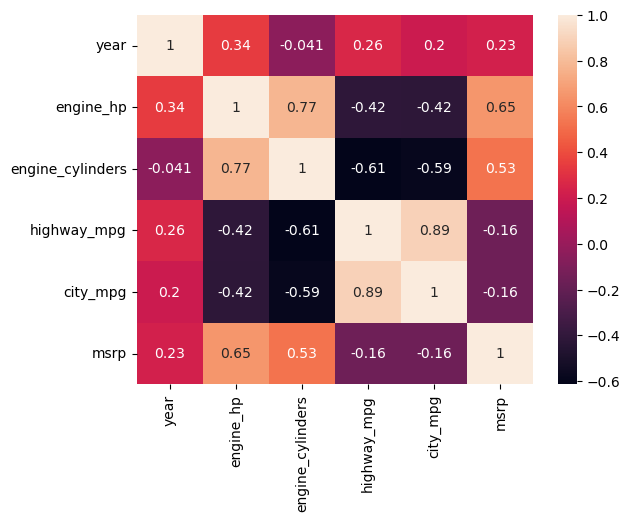

In [36]:
sns.heatmap(corrMatrix, annot=True)
plt.show()